# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [110]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from api_keys import weather_api_key
from random import choice, random, seed
import numpy as np
import scipy.stats as sts
from datetime import datetime
city_name = ''
base = 'api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format(city_name,weather_api_key)


## Generate Cities List

In [2]:
seed(40)

lats = np.arange(-55.0,85.0,.1)
lon = np.arange(-180,180,.1)
coords = []
for i in range(1000):
    coords.append([])
    coords[i].append(choice(lats))
    coords[i].append(choice(lon))

c_group = []
for lat,lng in coords:
    c_group.append((lat,lng))
c_group = set(c_group)

city_objects = []
for lt, lg in c_group:
    city_objects.append((((vars(citipy.nearest_city(lt,lg)).values())),lt,lg))
cities_df = pd.DataFrame({"nearest_city_name" : [list(x)[0] for x in [values[0] for values in city_objects]],
              'nearest_country_code' : [list(x)[1] for x in [values[0] for values in city_objects]],
              'lat' : [values[1] for values in city_objects],
              'lg':[values[2] for values in city_objects] })

unique_cities = cities_df.drop_duplicates(subset = 'nearest_city_name')
unique_cities[unique_cities.duplicated(subset='nearest_city_name')]
unique_cities

,nearest_city_name,nearest_country_code,lat,lg
0,clyde river,ca,72.4,-82.0
1,saint-philippe,re,-32.3,60.0
2,east london,za,-42.6,35.0
3,puerto ayora,ec,-13.1,-110.0
4,bredasdorp,za,-44.9,22.9
...,...,...,...,...
987,tongchuan,cn,35.2,108.7
988,kisangani,cd,0.5,26.2
991,marti,cu,22.9,-81.0
997,presidente epitacio,br,-21.8,-52.1


In [118]:
"""STILL NEED TO EXTRACT DATE AND REDUCE API CALL FUNCTION"""
to_df = []
to_keep = ['main','clouds','wind','sys','coord','name','dt']
broken_cities = []
i = 0
print("""Beginning Data Retrieval     
        -----------------------------
        """)
for city in unique_cities['nearest_city_name']:
    try:
        i+=1
        city_name = city
        base = 'http://api.openweathermap.org/data/2.5/weather?q={}&units=imperial&appid={}'.format(city_name,weather_api_key)
        print(f'Processing record {i} | {city}')
        reBuild = {x : requests.get(base).json()[x] for x in to_keep}
        reBuild['humidity'] = reBuild['main']['humidity']
        reBuild['temp_max'] = reBuild['main']['temp_max']
        reBuild['country'] = reBuild['sys']['country']
        reBuild['clouds'] = reBuild['clouds']['all']
        reBuild['wind'] = reBuild['wind']['speed']
        reBuild['lng'],reBuild['lat'] = reBuild.pop('coord').values()
        reBuild['Date'] = datetime.utcfromtimestamp(reBuild['dt']).strftime("%m/%d/%Y")
        del reBuild['sys'],reBuild['main'],reBuild['dt']
        to_df.append(reBuild)
        
    except KeyError:
        broken_cities.append(city)
        continue
    


Beginning Data Retrieval     
        -----------------------------
        
Processing record 1 | clyde river
Processing record 2 | saint-philippe
Processing record 3 | east london
Processing record 4 | puerto ayora
Processing record 5 | bredasdorp
Processing record 6 | hilo
Processing record 7 | avarua
Processing record 8 | dekar
Processing record 9 | provideniya
Processing record 10 | cabo san lucas
Processing record 11 | eyl
Processing record 12 | longyan
Processing record 13 | auki
Processing record 14 | khonuu
Processing record 15 | kapaa
Processing record 16 | krasnoselkup
Processing record 17 | nikolskoye
Processing record 18 | shcherbynivka
Processing record 19 | nurota
Processing record 20 | christchurch
Processing record 21 | chuy
Processing record 22 | jamestown
Processing record 23 | bokoro
Processing record 24 | ust-ilimsk
Processing record 25 | hobart
Processing record 26 | rikitea
Processing record 27 | hithadhoo
Processing record 28 | adrar
Processing record 29 | iqalu

In [120]:
#base = 'http://api.openweathermap.org/data/2.5/weather?q={}&units=imperial&appid={}'.format('rimbey',weather_api_key)
#pprint(requests.get(base).json())
broken_cities

['khonuu',
 'nguiu',
 'saleaula',
 'ruatoria',
 'amderma',
 'illoqqortoormiut',
 'vaitupu',
 'ngukurr',
 'sentyabrskiy',
 'tsihombe',
 'sofiysk',
 'mutsamudu',
 'belushya guba',
 'buqayq',
 'mys shmidta',
 'senmonorom',
 'burica',
 'samusu',
 'tumannyy',
 'attawapiskat',
 'thilogne',
 'taolanaro',
 'khormuj',
 'vylgort',
 'warqla',
 'barentsburg',
 'sao miguel do oeste',
 'tabiauea',
 'laiagam',
 'samalaeulu',
 'hebertville',
 'balimo',
 'kerki',
 'talawdi',
 'hunza',
 'kuche',
 'zhanatas',
 'terenga',
 'cheuskiny',
 'rungata']

In [121]:
ta_daa = pd.DataFrame(to_df)[['name','country','lng','lat','humidity','wind','clouds','temp_max','Date']]

ta_daa = ta_daa.rename(columns = {"name":'Name',
                                  'country':'Country',
                                 'lng':'Lng',
                                 'lat':'Lat',
                                 'humidity':'Humidity (%)',
                                 'wind':'Wind (mph)',
                                 'temp_max':'Max Temp (F)',
                                 'clouds':'Clouds (%)'})
ta_daa.to_csv('finally.csv')
ta_daa

,Name,Country,Lng,Lat,Humidity (%),Wind (mph),Clouds (%),Max Temp (F),Date
0,Clyde River,CA,-68.59,70.47,95,13.87,90,32.00,10/17/2020
1,Saint-Philippe,RE,55.77,-21.36,56,5.82,2,71.60,10/17/2020
2,East London,ZA,27.91,-33.02,80,14.50,0,64.44,10/17/2020
3,Puerto Ayora,EC,-90.35,-0.74,93,8.01,95,70.00,10/17/2020
4,Bredasdorp,ZA,20.04,-34.53,93,4.70,78,51.80,10/17/2020
...,...,...,...,...,...,...,...,...,...
516,Tongchuanshi,CN,109.09,35.08,39,3.40,0,55.83,10/17/2020
517,Kisangani,CD,25.20,0.52,98,0.54,92,69.64,10/17/2020
518,Martí,CU,-80.92,22.95,94,12.75,90,77.00,10/17/2020
519,Presidente Epitácio,BR,-52.12,-21.76,61,11.41,97,72.37,10/17/2020


In [101]:
def pulled_pork(y,hem = None,reg = False):
    
    if hem == 'north':
        x = ta_daa[ta_daa['Lat'] >= 0]
        x = x['Lat']
        y = y.loc[ta_dabroken_cities'] >= 0]
    elif hem == 'south':
        x = ta_daa[ta_daa['Lat'] <= 0]
        x = x['Lat']
        y = y.loc[ta_daa['Lat'] <= 0]     
    else:
        x = ta_daa['Lat']
    
    if reg == True:
        slope, intercept, rvalue, pvalue, stderr = sts.linregress(x,y)
        line = f'y = {round(slope,2)}*x + {round(intercept,2)}'
        plt.plot(x, slope*x + intercept, color = 'red')
        plt.annotate(line,(10,10),xycoords = 'figure pixels',color = 'red')
        print(line)
        print('The R-Squared is:',rvalue**2)
        
    plt.scatter(x,y)
    plt.xlabel('{}'.format(x.name.upper()))
    plt.ylabel('{}'.format(y.name.upper()))
    plt.title('{} vs. {} Plot'.format(x.name.upper(),y.name.upper()))

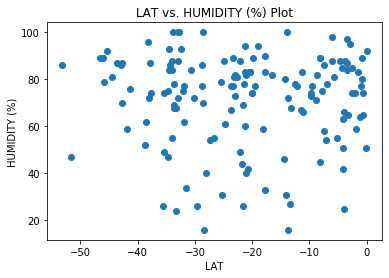

In [92]:
pulled_pork(ta_daa['Humidity (%)'], hem = 'south')

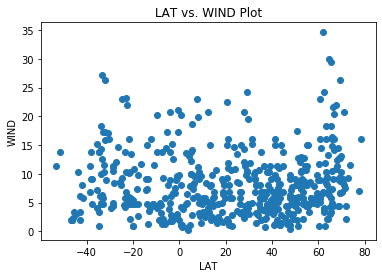

In [77]:
pulled_pork(ta_daa['wind'])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

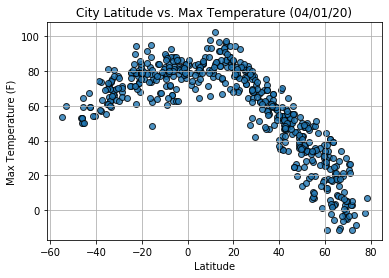

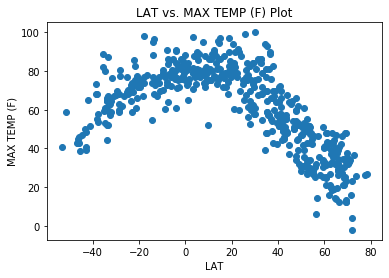

In [93]:
pulled_pork(ta_daa['Max Temp (F)'])

## Latitude vs. Humidity Plot

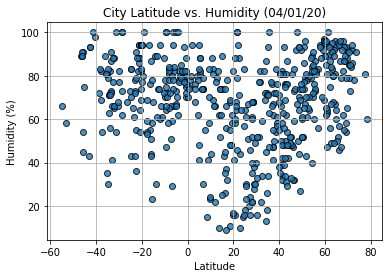

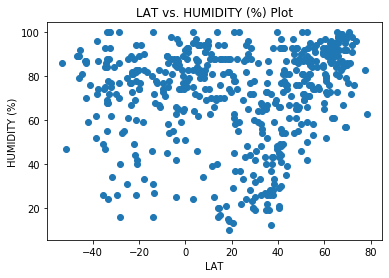

In [94]:
pulled_pork(ta_daa['Humidity (%)'])

## Latitude vs. Cloudiness Plot

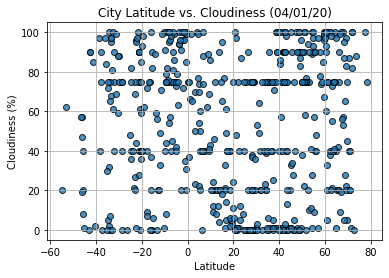

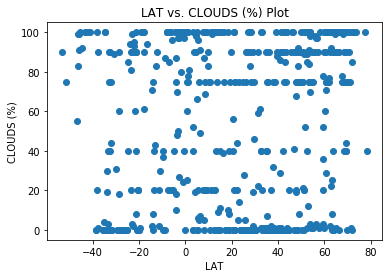

In [95]:
pulled_pork(ta_daa['Clouds (%)'])

## Latitude vs. Wind Speed Plot

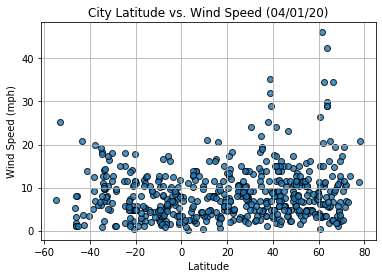

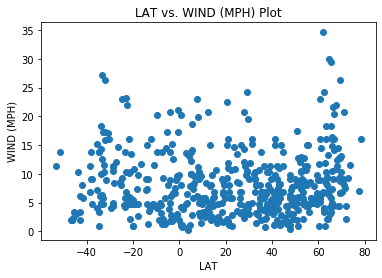

In [96]:
pulled_pork(ta_daa['Wind (mph)'])

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.93*x + 93.57
The r-value is: 0.7412188811937914


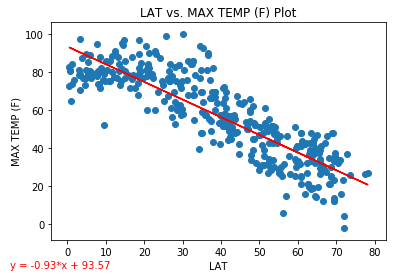

In [102]:
pulled_pork(ta_daa['Max Temp (F)'],hem = 'north', reg = True)

The r-value is: 0.46937863826630627


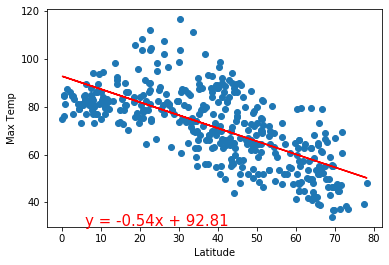

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.63*x + 83.62
The r-value is: 0.5026488699990503


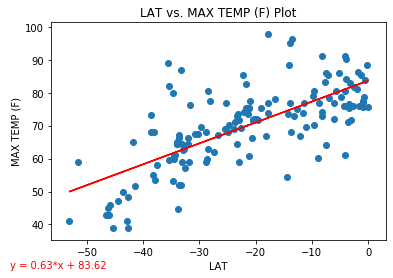

In [103]:
pulled_pork(ta_daa['Max Temp (F)'], hem = 'south', reg = True)

The r-value is: 0.6082708688906918


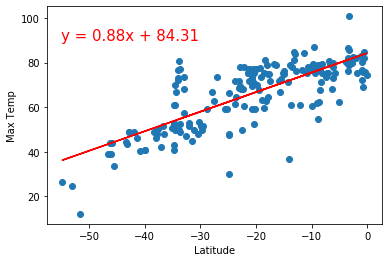

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.28*x + 60.41
The r-value is: 0.06301896567130617


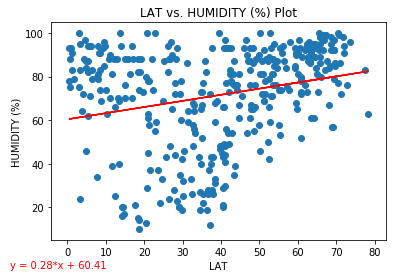

In [105]:
pulled_pork(ta_daa['Humidity (%)'], hem = 'north', reg = True)


The r-value is: 0.000543987878808455


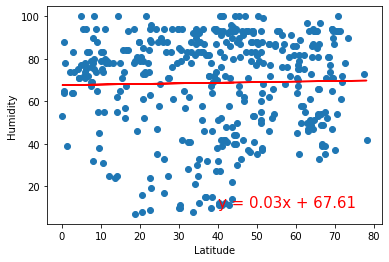

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.06*x + 70.4
The r-value is: 0.001885347247738808


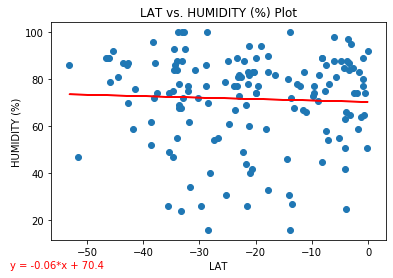

In [106]:
pulled_pork(ta_daa['Humidity (%)'], hem = 'south', reg = True)

The r-value is: 0.014985174297345524


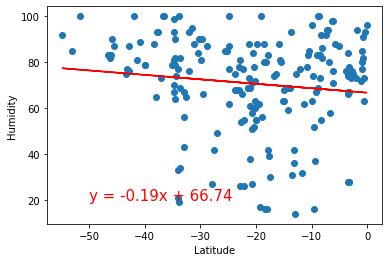

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.44*x + 35.38
The r-value is: 0.04825776599240322


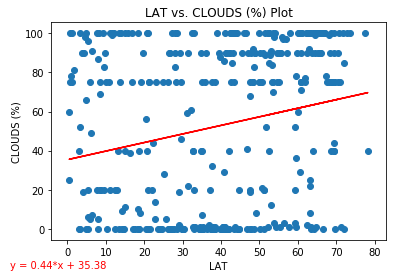

In [107]:
pulled_pork(ta_daa['Clouds (%)'], hem = 'north', reg = True)

The r-value is: 0.0020898727664228514


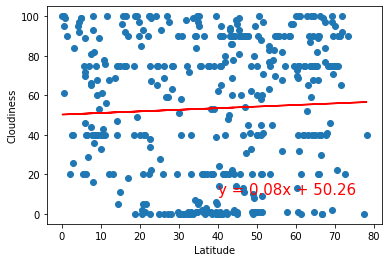

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.32*x + 59.97
The r-value is: 0.011549996061832355


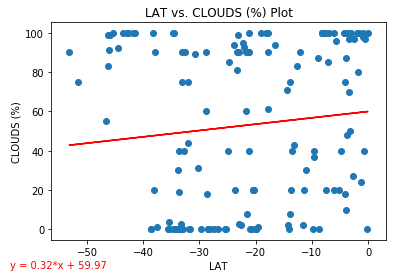

In [108]:
pulled_pork(ta_daa['Clouds (%)'], hem = 'south', reg = True)

The r-value is: 0.0035263772085582894


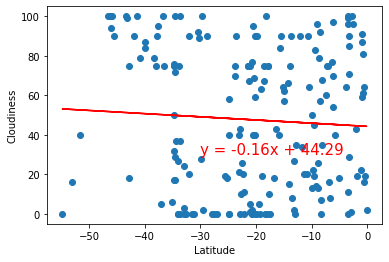

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.05*x + 6.04
The r-value is: 0.03313191636879306


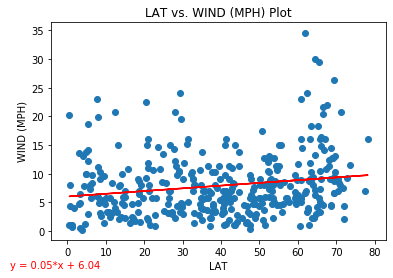

In [109]:
pulled_pork(ta_daa['Wind (mph)'], hem = 'north', reg = True)

The r-value is: 0.04019723576144484


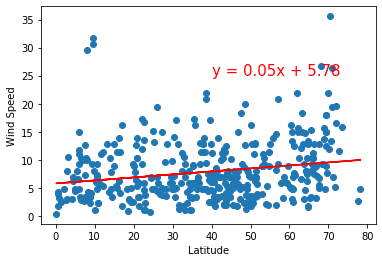

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


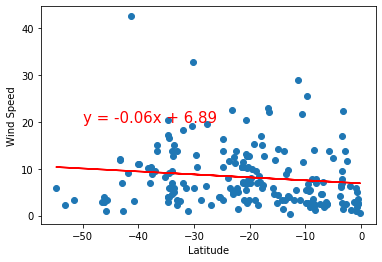

In [32]:
pulled_pork(ta_daa['Wind (mph)'], hem = 'south', reg = True)